# Изучение рынка заведений общественного питания Москвы

## Цель и задачи  

**Цель:** Провести исследовательский анализ данных рынка заведений общественного питания Москвы.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбце `Сhurn` с другими данными.
4. Сформулировать выводы по проведённому анализу.

___


## Данные

Для анализа поступили данные с заведениями общественного питания Москвы, составленный на основе данных сервисов N Карты и N Бизнес на лето 2022 года. Данные состоят из двух датасетов:

- `/datasets/rest_info.csv` — информация о заведениях общественного питания;
- `/datasets/rest_price.csv` — информация о среднем чеке в заведении.

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

### Описание датасета `rest_price`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
    -  «Средний счёт: 1000–1500 ₽»;
    -  «Цена чашки капучино: 130–220 ₽»;
    -  «Цена бокала пива: 400–600 ₽».
    -  и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: 
    -  Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    -  Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    -  Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: 
    -  Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    -  Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    -  Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт..


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.
___

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [ ]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('path/datasets/rest_info.csv')
price_df = pd.read_csv('path/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем информацию о датафрейме методом `info()`

In [5]:
# Выводим информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8 406 строк, в которых представлена информация о заведениях.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов названы в едином стиле.
- Столбцы `id`, `name`, `category`, `address`, `district`, `hours` содержат строковые данные, поэтому тип `object` отлично подходит.
- Столбцу `rating` тоже соответствует тип данных `float64`, столбец `chain` содержит информацию в формате нуля и единицы, тип `int64` можно использовать, но также можно было бы привести столбец к булевому типу. Столбец `seats` можно привести к целочисленному типу данных, так как он содержит информацию о кол-ве посадочных мест.
- Пропуски содержатся в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 4 столбца и 4 058 строк, в которых представлена информация о стоимости в заведениях. По аналогии с предыдущим датасетом можно отметить, что:
- Названия столбцов приведены к единому стилю.
- Типы данных соответствуют содержимому.
- Пропуски присутствуют в каждом столбце, при этом пропуски для столбцов `middle_avg_bill` и `middle_coffee_cup` по условию - это нормальное явление, так как в них содержатся условные данные, которые зависят от значений в другом столбце. 
- Значения в столбцах соответствуют описанию.

Первичное знакомство показывает, что данные хорошего качества — в них практически нет пропущенных значений, а сами данные соответствуют описанию и выглядят корректными. Настало время следующего этапа — предобработки данных.

___

### Подготовка единого датафрейма

Объединим данные двух датасетов в один, с которым и продолжим работу.

In [8]:
# соединим данные в единый датафрейм df
df = price_df.merge(info_df, on='id', how='outer')

# выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
 5   name               8406 non-null   object 
 6   category           8406 non-null   object 
 7   address            8406 non-null   object 
 8   district           8406 non-null   object 
 9   hours              7870 non-null   object 
 10  rating             8406 non-null   float64
 11  chain              8406 non-null   int64  
 12  seats              4795 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


___

In [10]:
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
copy_df = df.copy() 
len(copy_df)

8406

## 2. Предобработка данных

### 2.1. Оптимизируем типы данных

С данными банка здесь работы не так много — понадобится только провести оптимизацию целочисленных данных. В целом этот шаг можно было бы пропустить, особенно если данных немного — такое несоответствие не будет ошибкой при обработке данных. Однако оставим этот шаг и проведём оптимизацию целочисленных типов данных.

Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`:

In [11]:
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [12]:
# приведем столбец seats также к целочисленному типу, заменив пропуски на индикатор -1, и понизим разрядность
df['seats'] = df['seats'].fillna(-1).round().astype(int)
df['seats'] = pd.to_numeric(df['seats'], downcast='integer')

Типы данных были успешно оптимизированы с понижением размерности целочисленных данных.
___

In [13]:
# понизим разрядность числовых данных с 64 до 32
for column in ['rating', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column], downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float32
 4   middle_coffee_cup  535 non-null    float32
 5   name               8406 non-null   object 
 6   category           8406 non-null   object 
 7   address            8406 non-null   object 
 8   district           8406 non-null   object 
 9   hours              7870 non-null   object 
 10  rating             8406 non-null   float32
 11  chain              8406 non-null   int8   
 12  seats              8406 non-null   int16  
dtypes: float32(3), int16(1), int8(1), object(8)
memory usage: 714.2+ KB


### 2.2. Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбце `price`, `avg_bill`, `hours`. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [14]:
# Применяем метод isna() к датафрейму
df.isna().sum()

id                      0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
dtype: int64

In [15]:
# Подсчитываем процент строк с пропусками
round(df.isna().sum() / df.shape[0] * 100, 2)

id                    0.00
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                 0.00
dtype: float64

60.5% пропущенных значений в столбце `price`, что достаточно много, просто удалить их мы не можем. Заменим пропущенные значения на категориальный индикатор, чтобы учитывать заведения без категории стоимости в дальнейщем анализе. Аналогично заменим пропуски в столбце `hours`, которые связаны с отсутствием информации о часах работы заведения.

In [17]:
# заменяем пропущенные значения
df['price'] = df['price'].fillna('не указано')
df['hours'] = df['hours'].fillna('не указано')

Пропущенные значения в столбце `avg_bill` можно заменить на индикатор 0, так как данные в столбце содержатся в виде строки с информацией о диапазоне. Значение `0` будет выбиваться из общего вида, что подойдет для индикатора.

In [18]:
# заменяем пропущенные значения
df['avg_bill'] = df['avg_bill'].fillna('0')

Пропущенные значения в столбцах `middle_avg_bill` и `middle_coffee_cup` заменим на индикатор -1. Пропуски связаны с тем, что данные в этих столбцах зависят от значений в столбце `avg_bill`, поэтому это не является ошибкой. Но чтобы не ошибиться, поставим отрицательное значение индикатору, чтобы не перепутать со стоимостью.

In [19]:
# заменяем пропущенные значения
df['middle_avg_bill'] = df['middle_avg_bill'].fillna(-1)
df['middle_coffee_cup'] = df['middle_coffee_cup'].fillna(-1)

### 2.3. Явные и неявные дубликаты в данных:

In [20]:
# Проверяем уникальные значения в столбцах
for column in ['name', 'category', 'district', 'hours']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт 20:00–02:00; пт,сб 20:00–06:00'
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00']



Проверим по кол-ву уникальных значений в столбце `name`, что в данных действительно нет дубликатов, приведя к единому регистру. Если мы получим разные значения, то унифицируем данные этого столбца, в противном случае можно будет оставить все, как есть.

In [21]:
print(f'Кол-во уникальных значений: {df["name"].nunique()}, в едином регистре: {df["name"].str.lower().nunique()}')

Кол-во уникальных значений: 5614, в едином регистре: 5512


Делаем вывод, что все же присутствуют неявные дубликаты среди названий, приведем все значения к lower-формату.

In [22]:
df['name'] = df['name'].str.lower()

In [23]:
# удалим конечные пробелы
df['name'] = df['name'].str.strip()

In [24]:
# выведем информацию по явным дубликатам
df.duplicated().sum()

0

Полных дубликатов нет, выведем кол-во дубликатов в столбце `name`

In [25]:
df['name'].duplicated().sum()

2894

Всего 2 894 полных дубликатов в названиях заведений, но это может быть просто повторяющееся наименование заведения (например, сетевые заведения), чтобы убедиться, что ошибок нет и мы не удалим лишнего, выведем кол-во уникальных значений тройки: название, адрес, округ.

In [26]:
# кол-во дубликатов тройки
df[['name', 'address', 'district']].duplicated().sum()

3

Всего полных повторений три штуки, удалить их не страшно, сделаем это:

In [27]:
# удалим строки с дубликатами
df = df.drop_duplicates(subset=['name', 'address', 'district'])

Дубликаты удалены!

### 2.4. Добавление столбца-метки о круглосуточной работе заведения

In [ ]:
# создадим функцию для проверки
def check_24_7(hours):
    return hours == 'ежедневно, круглосуточно'

# Применение функции через .apply()
df['is_24_7'] = df['hours'].apply(check_24_7)

df['is_24_7'].value_counts()

False    7673
True      730
Name: is_24_7, dtype: int64

In [ ]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8403 
 Удалено строк в датасете после обработки 3 
 Процент потерь 0.04


### 2.5. Промежуточные выводы после предобработки

На этом предобработка завершена. Предоставленные данные хорошего качества и требуют не так много действий по предобработке. 

В результате предобработки данных были выполнены следующие действия:

- Изучены пропуски в данных, все пропуски были заменены на индикаторы. 
- Данные проверили на явные и неявные дубликаты — удалены 3 строки с повторяющимся названием, адресом и округом.
- Были объедены датафреймы `info_df` и `price_df` в единый датафрейм `df`
- Понизили разрядность числовых данных с 64 до 32 у столбцов `rating`, `middle_avg_bill` и `middle_coffee_cup`
- Столбцы `seats` и `chain` также были приведены к целочисленному типу


## 3. Исследовательский анализ данных

Рассмотрим, какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией.

In [33]:
# Посчитаем количество заведений по категориям
print('Распределение заведений в зависимости от категории:')
df.groupby('category')['id'].nunique()

Распределение заведений в зависимости от категории:


category
бар,паб             764
булочная            256
быстрое питание     603
кафе               2377
кофейня            1413
пиццерия            633
ресторан           2042
столовая            315
Name: id, dtype: int64

In [34]:
# Посчитаем количество заведений по категориям
print('Распределение заведений в зависимости от категории в относительных значениях:')
df['category'].value_counts(normalize=True)

Распределение заведений в зависимости от категории в относительных значениях:


кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: category, dtype: float64

Больше всего заведений категории `кафе`, `ресторан` и `кофейня`: 2 377, 2 041 и 1 413 соответственно. 

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце category:

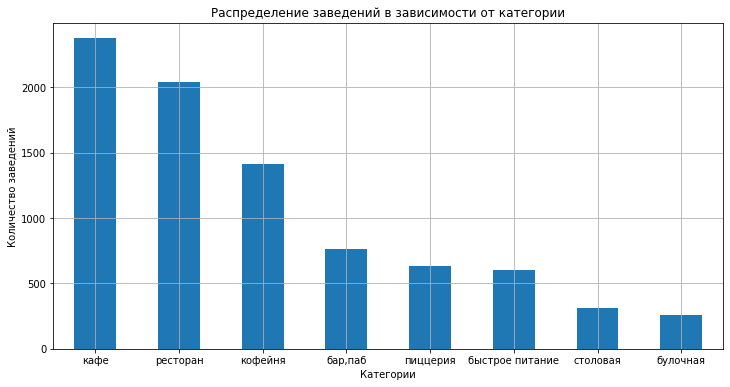

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Теперь отлично видно преобладающие по кол-ву заведений категории, отлично!

___
Рассмотрим, какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводим подходящими визуализациями.

In [36]:
# Посчитаем количество заведений по районам
print('Распределение заведений в зависимости от района:')
df.groupby('district')['id'].nunique()

Распределение заведений в зависимости от района:


district
Восточный административный округ            798
Западный административный округ             850
Северный административный округ             899
Северо-Восточный административный округ     890
Северо-Западный административный округ      409
Центральный административный округ         2242
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Южный административный округ                892
Name: id, dtype: int64

In [37]:
# Посчитаем количество заведений по районам
print('Распределение заведений в зависимости от района в относительных значениях:')
df['district'].value_counts(normalize=True)

Распределение заведений в зависимости от района в относительных значениях:


Центральный административный округ         0.266809
Северный административный округ            0.106986
Южный административный округ               0.106153
Северо-Восточный административный округ    0.105915
Западный административный округ            0.101154
Восточный административный округ           0.094966
Юго-Восточный административный округ       0.084970
Юго-Западный административный округ        0.084375
Северо-Западный административный округ     0.048673
Name: district, dtype: float64

Мы видим, что в ЦАО количество заведений преобладает, сопроводим информацию визуализацией:

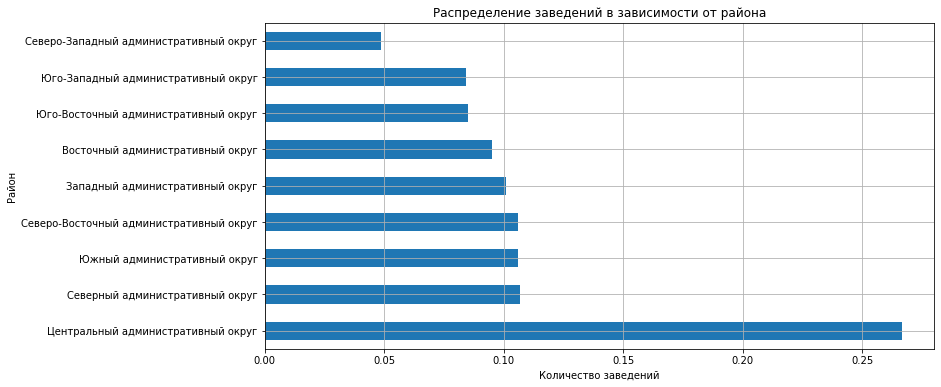

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts(normalize=True).plot(
               kind='barh', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от района'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Район')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [39]:
# Посчитаем количество заведений по категориям в ЦАО
print('Распределение заведений по категориям в ЦАО:')
df.loc[(df['district'] == 'Центральный административный округ')].groupby('category')['id'].nunique()

Распределение заведений по категориям в ЦАО:


category
бар,паб            364
булочная            50
быстрое питание     87
кафе               464
кофейня            428
пиццерия           113
ресторан           670
столовая            66
Name: id, dtype: int64

In [40]:
# Посчитаем количество заведений по категориям в ЦАО
print('Распределение заведений по категориям в ЦАО в относительных значениях:')
df_sao = df.loc[(df['district'] == 'Центральный административный округ')]
df_sao['category'].value_counts(normalize=True)

Распределение заведений по категориям в ЦАО в относительных значениях:


ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: category, dtype: float64

Сопроводим информацию выше визуализацией:

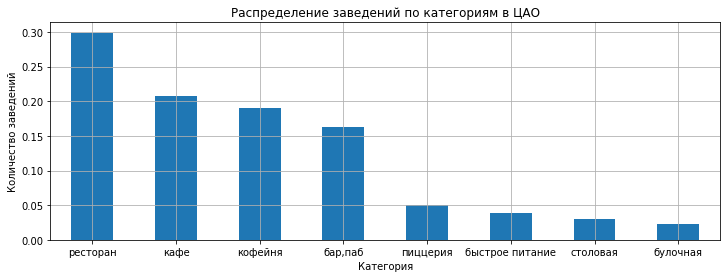

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

df_sao = df.loc[(df['district'] == 'Центральный административный округ')]
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_sao['category'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений по категориям в ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Мы видим, что в ЦАО преобладают те же категории заведений!

В данных присутствует информация по заведениям следующих районов Москвы: Восточный административный округ, Западный административный округ, Северный административный округ, Северо-Восточный административный округ, Северо-Западный административный округ, Центральный административный округ, Юго-Восточный административный округ, Юго-Западный административный округ, Южный административный округ.

В центральном административном округе располагается наибольшее количество заведений (26%), второй по полярности район - Юго-Западный административный округ (10.7%) и на третьем месте Южный административный округ (10.6%). Наименьшее количество заведений находится в Северо-Западном административном округе (4%) и Юго-Западном административном округе (8%).

Рассмотрели отдельно категории заведений в Центральном административном районе: наиболее популярные категории - ресторан (29%), кафе (20%) и кофейня (19%). Наименьшей популярностью пользуются булочная (2%), столовая (2%) и заведения быстрого питания (3%).

___
Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуем данные, ответим на вопросы и построим необходимые визуализации.

In [42]:
# Посчитаем количество сетевых и несетевых заведений 
print('Распределение сетевых и несетевых заведений:')
df.groupby('chain')['id'].nunique()

Распределение сетевых и несетевых заведений:


chain
0    5200
1    3203
Name: id, dtype: int64

In [43]:
# Посчитаем количество сетевых и несетевых заведений 
print('Распределение сетевых и несетевых заведений в относительных значениях:')
df['chain'].value_counts(normalize=True)

Распределение сетевых и несетевых заведений в относительных значениях:


0    0.618827
1    0.381173
Name: chain, dtype: float64

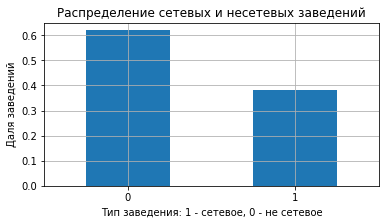

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(6, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Тип заведения: 1 - сетевое, 0 - не сетевое')
plt.ylabel('Даля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Мы видим, что не сетевых заведений больше на 1 995, посмотрим дополнительно на распределение по категориям:

In [45]:
# Посчитаем количество сетевых и несетевых заведений по категориям
print('Распределение сетевых и несетевых заведений:')
df.groupby(['chain', 'category'])['id'].nunique()

Распределение сетевых и несетевых заведений:


chain  category       
0      бар,паб             596
       булочная             99
       быстрое питание     371
       кафе               1598
       кофейня             693
       пиццерия            303
       ресторан           1313
       столовая            227
1      бар,паб             168
       булочная            157
       быстрое питание     232
       кафе                779
       кофейня             720
       пиццерия            330
       ресторан            729
       столовая             88
Name: id, dtype: int64

In [46]:
# Посчитаем долю сетевых и несетевых заведений по категориям
print('Распределение категорий сетевых заведений в относительных значениях:')
df_sao = df.loc[(df['chain'] == 1)]
df_sao['category'].value_counts(normalize=True)

category_count = df_sao['category'].value_counts()
total_count = df['category'].value_counts()
proportion = category_count / total_count
proportion

Распределение категорий сетевых заведений в относительных значениях:


бар,паб            0.219895
булочная           0.613281
быстрое питание    0.384743
кафе               0.327724
кофейня            0.509554
пиццерия           0.521327
ресторан           0.357003
столовая           0.279365
Name: category, dtype: float64

Кафе, ресторан и кофейня лидируют среди сетевых заведений по количеству, посмотрим это на визуализации:

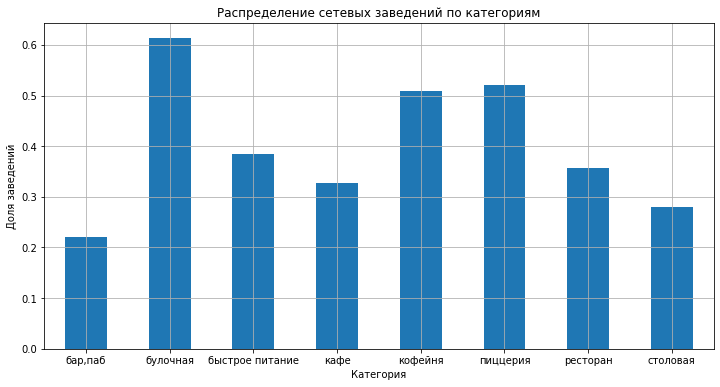

In [47]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
proportion.plot(kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение сетевых заведений по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Количество не сетевых заведений преобладает над количеством сетевых (5 201 к 3 205), 62% не сетевых заведений в городе и 38% сетевых. 

Мы рассмотрели категории сетевых заведений, чтобы понять, какие встречаются чаще. Можно сделать вывод, что в тройку лидеров вошли: кафе (24%), рестораны (23%) и кофейни (22%). Меньше всего сетевых заведений по категориям столовая (3%) и булочная (4%).

Больше всего сетевых заведений встречается среди булочных (61%), пиццерий (52%) и кофейни (51%).

___
Исследуем количество посадочных мест в заведениях. Посмотрим, встречаются ли в данных аномальные значения или выбросы. И если да, то с чем они могут быть связаны. Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводим подходящими визуализациями.


In [48]:
# выведем уникальные значения кол-ва посадочных мест
df['seats'].sort_values().unique()

array([  -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   24,   25,   26,   27,   28,   29,   30,   32,   33,   34,
         35,   36,   37,   38,   39,   40,   41,   42,   43,   44,   45,
         46,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
         58,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
         70,   72,   74,   75,   76,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   90,   92,   93,   94,   95,
         96,   97,   98,   99,  100,  102,  104,  105,  106,  107,  108,
        110,  112,  113,  114,  115,  116,  118,  120,  122,  124,  125,
        126,  127,  128,  130,  131,  132,  133,  135,  138,  140,  141,
        143,  144,  145,  146,  147,  148,  150,  151,  154,  155,  157,
        158,  159,  160,  161,  164,  165,  166,  167,  168,  170,  173,
        174,  175,  176,  178,  180,  184,  185,  1

Создадим визуализацию распределения, исключив информацию с индикатором -1, так как это отсутствующие для нас данные и они будут коверкать визуализацию

In [49]:
df_seats = df.loc[df['seats'] >= 0]
df_seats['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Стандартное отклонение (122) немного превышает значение среднего (108), что говорит о вариативности значений. Минимальное значение 0, максимальное 1288, верхняя граница во много раз превышает среднее значение, что говорит о наличии выбросов, которые могут влиять на общий характер распределения. Поскольку медиана (75) ниже среднего значения, это означает, что распределение асимметрично и смещено вправо. Вероятно, большое количество малых значений тянет медиану вниз, тогда как высокие выбросы сдвигают среднее вверх.

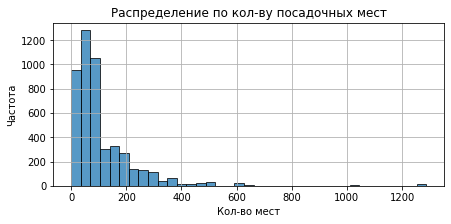

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_seats['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=37, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение по кол-ву посадочных мест')
plt.xlabel('Кол-во мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

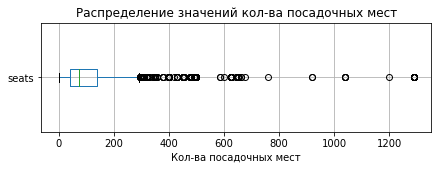

In [51]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_seats.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений кол-ва посадочных мест')
plt.xlabel('Кол-ва посадочных мест')

# Выводим график
plt.show()

Отдельно изучим категории заведений со значениями выше 800, так как это уже большое число посадочных мест для обычных заведений. 

In [52]:
df_anomal = df.loc[df['seats'] >= 800]
df_anomal.groupby('category')['id'].nunique()

category
бар,паб            4
быстрое питание    1
кафе               4
кофейня            3
пиццерия           1
ресторан           4
столовая           1
Name: id, dtype: int64

Данные выглядят очень странно, так как для бара, паба не свойственно кол-во посадочных мест выше 800, для кофейни тоже, остальные заведения еще с натяжкой могут подойти под такое большое количество мест. Объяснить аномальные значения можно ошибкой в данных. 

In [53]:
print('Распределение посадочных мест по категориям:')
df_seats.groupby('category')['seats'].agg(pd.Series.median)

Распределение посадочных мест по категориям:


category
бар,паб            82.0
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

Но вот распределение наиболее типичного кол-ва мест для каждой категории выглядит уже получше и более реалистично!

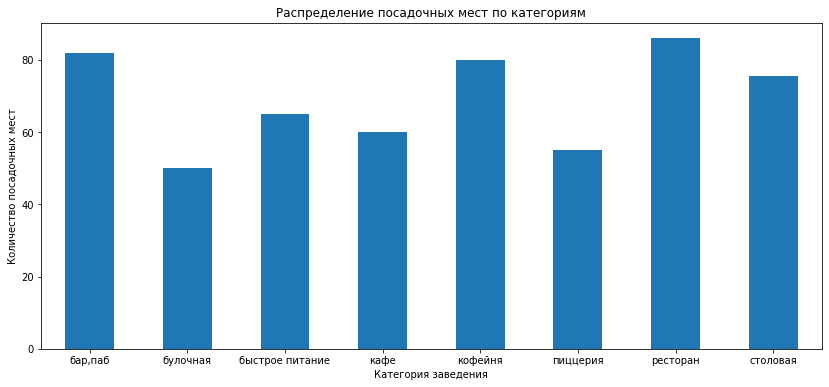

In [54]:
avg_seats_by_category = df_seats.groupby('category')['seats'].agg(pd.Series.median)

# Строим столбчатую диаграмму
plt.figure(figsize=(14, 6))
ax = avg_seats_by_category.plot(x='category', 
                                y='seats', 
                                kind='bar', 
                                rot=0)

# Настраиваем оформление графика
plt.title('Распределение посадочных мест по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')

# Выводим график
plt.show()

Количество посадочных мест имеет достаточно сильную неоднородность: в данных присутствуют выбросы, которые влияют на их распределение. Возможно, некоторые заведения располагаются в больших торговых центрах или на стадионах, что завышает средние показатели по количеству мест в этих заведениях, но таких случаи единичны. Рассмотрели медиану значений по категорий заведений, можно сделать вывод, что в кафе медианное количество мест равно 60, в ресторане 86, в кофейне 80. Наименьшее количество посадочных мест в булочной (50) и в пиццерии (55). 

___
Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений и посмотрим, сильно ли различаются усреднённые рейтинги для разных типов общепита

In [55]:
df['rating'].describe()

count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Небольшое стандартное отклонение (0.47) говорит о том, что большинство значений сконцентрировано близко к друг другу. Первый квартиль (25%) — 4.1, медиана (50%) — 4.3, третий квартиль (75%) — 4.4. Эти величины близки друг к другу, что свидетельствует о симметрии и равномерности распределения. Минимальное значение - 1, а максимальное - 5, что свидетельствует об отсутствии ошибок в данных.

In [56]:
print('Распределение рейтинга по категориям:')
df.groupby('category')['rating'].describe()

Распределение рейтинга по категориям:


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2377.0,4.123896,0.566200,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277283,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413143,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


Среди всех заведений оценки примерно одинаковые и находятся в районе 4.0-4.4

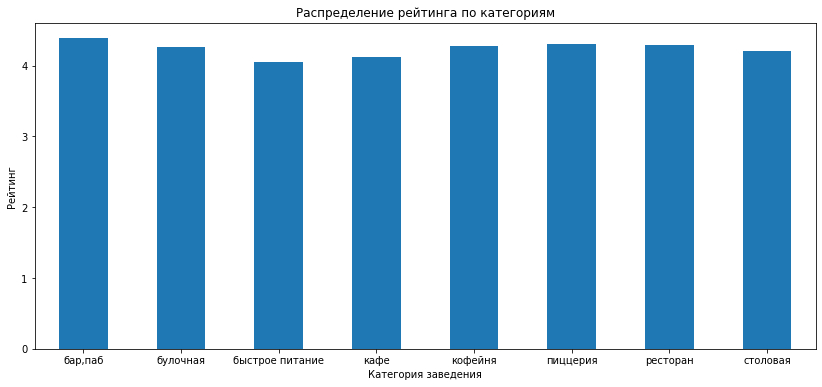

In [57]:
avg_rating_by_category = df.groupby('category')['rating'].mean()

# Строим столбчатую диаграмму
plt.figure(figsize=(14, 6))
ax = avg_rating_by_category.plot(x='category', 
                                y='rating', 
                                kind='bar', 
                                rot=0)

# Настраиваем оформление графика
plt.title('Распределение рейтинга по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Рейтинг')

# Выводим график
plt.show()

В целом рейтинг заведений для всех категорий примерно одинаковый. 

В целом оценки заведений примерно близки к друг другу и вариьруются в диапазоне от 4.0 до 4.5. 
Самая высокая средняя оценка у категории бар, паб (4.38), диапазон большей части оценок у этой категории от 4.3 до 4.6. Минимальная средняя оценка у заведений быстрого питания (4.05), диапазон большего количества оценок в рамках от 3.9 до 4.3.

Все значения оценок близки к друг другу, отсутствуют категории с явным большим количеством положительных оценок или явным количеством отрицательных оценок. 

___
Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

In [58]:
# создадим копию датасета и заменим поставленные заглушки на пропуски
df_corr = df.copy()
df_corr['seats'] = df_corr['seats'].replace(-1, np.nan)
df_corr['price'] = df_corr['price'].replace('не указано', np.nan)
df_corr['hours'] = df_corr['hours'].replace('не указано', np.nan)
df_corr['avg_bill'] = df_corr['avg_bill'].replace(0, np.nan)
df_corr['middle_avg_bill'] = df_corr['middle_avg_bill'].replace(-1, np.nan)
df_corr['middle_coffee_cup'] = df_corr['middle_coffee_cup'].replace(-1, np.nan)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8403 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8403 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           8403 non-null   object 
 3   middle_avg_bill    3149 non-null   float32
 4   middle_coffee_cup  535 non-null    float32
 5   name               8403 non-null   object 
 6   category           8403 non-null   object 
 7   address            8403 non-null   object 
 8   district           8403 non-null   object 
 9   hours              7868 non-null   object 
 10  rating             8403 non-null   float32
 11  chain              8403 non-null   int8   
 12  seats              4792 non-null   float64
 13  is_24_7            8403 non-null   bool   
dtypes: bool(1), float32(3), float64(1), int8(1), object(8)
memory usage: 771.4+ KB


In [59]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_corr[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.198917
district,0.189389
is_24_7,0.160864
chain,0.119061
seats,0.000000


Мы видим, что рейтинг заведений коррелирует с типом цен (0.26), с категорией заведения (0.19), от района (0.18), с остальными столбцами кореляция варьируется от 0 до 0.16. 

Перед тем как перейти к дальнейшему анализу, визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

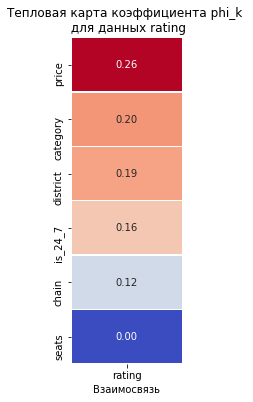

In [60]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Взаимосвязь')

# Выводим график
plt.show()

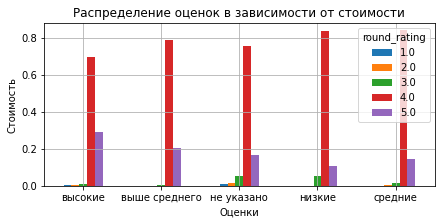

In [61]:
# Построим график столбчатой диаграммы
df['round_rating'] = round(df['rating'])
grouped = df.groupby('price')['round_rating'].value_counts(normalize=True).unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Распределение оценок в зависимости от стоимости',
               legend=True,
               ylabel='Стоимость',
               xlabel='Оценки',
               rot=0,
               figsize=(7, 3))
plt.grid()

# Выводим график
plt.show()

Теперь корреляция между рейтингом и другими признаками наглядно отображена. Можно продолжить исследование данных.

Большинство факторов имеют слабые положительные связи с рейтингом заведений. Среди них самая заметная связь наблюдается с ценой, но и она сравнительно мала. Остальные признаки демонстрируют крайне низкую значимость в предсказании рейтинга.

Тем не менее, согласно полученной корреляционной матрице, ни один из перечисленных признаков не оказывает решающего влияния на рейтинг заведения. Это подсказывает, что существуют другие скрытые факторы, определяющие привлекательность заведения, такие как качество обслуживания, атмосфера, чистота и другие субъективные параметры, которые не были учтены в исследовании.

Однако стоимость из всех факторов наибольшим образом (насколько это явно выражено) показывает связь с рейтингом. Предположительно более низкое ценообразование может более положительно влиять на выставление оценок, что показала визуализация распределения оценок по категориям цен.

___
Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. Посмотрим, к какой категории заведений они относятся.

In [62]:
# отберем только сетевые заведения
net_df = df.query('chain == 1')

# получим топ-15 сетевых заведений 
top_names = net_df[['name', 'category']].value_counts().head(15)
unique_top_restaurants = top_names.index.unique()
print('Топ-15 сетевых заведений:')
top_names

Топ-15 сетевых заведений:


name                                 category
шоколадница                          кофейня     119
домино'с пицца                       пиццерия     76
додо пицца                           пиццерия     74
one price coffee                     кофейня      71
яндекс лавка                         ресторан     69
cofix                                кофейня      65
prime                                ресторан     49
кофепорт                             кофейня      42
кулинарная лавка братьев караваевых  кафе         39
теремок                              ресторан     36
cofefest                             кофейня      31
чайхана                              кафе         26
буханка                              булочная     25
drive café                           кафе         24
кофемания                            кофейня      22
dtype: int64

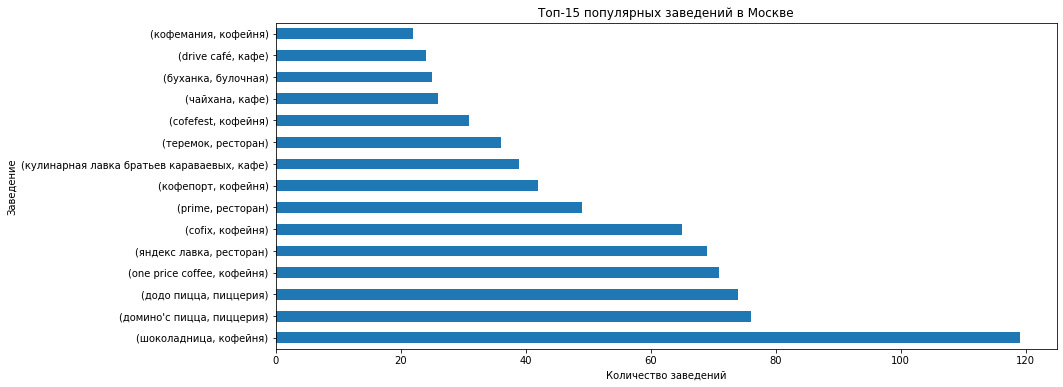

In [63]:
# Строим линейчатую диаграмму
plt.figure(figsize=(14, 6))

net_df = df.query('chain == 1')
top_names = net_df[['name', 'category']].value_counts().head(15)
ax = top_names.plot(x='category', 
                                y='rating', 
                                kind='barh', 
                                rot=0)

# Настраиваем оформление графика
plt.title('Топ-15 популярных заведений в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Заведение')

# Выводим график
plt.show()

In [ ]:
# посчитаем средний рейтинг для каждой сети
filtered_df = df.merge(top_names.reset_index(), on=['name', 'category'], how='inner')

# вычисляем средний рейтинг по каждой паре "заведение + категория"
result_df = filtered_df.groupby(['name', 'category'])['rating'].mean().reset_index()

# переименовываем столбец среднего рейтинга
result_df.columns = ['name', 'category', 'mean_rating']
result_df = result_df.sort_values(by='mean_rating')
result_df

,name,category,mean_rating
14,яндекс лавка,ресторан,3.872464
12,чайхана,кафе,3.946154
0,cofefest,кофейня,3.977419
2,drive café,кафе,4.025000
3,one price coffee,кофейня,4.069445
1,cofix,кофейня,4.075385
11,теремок,ресторан,4.105556
4,prime,ресторан,4.114285
9,кофепорт,кофейня,4.147619
7,домино'с пицца,пиццерия,4.171429


In [65]:
# Комментарий ревьюера
tmp = df.copy()          # создаем копию текущего датасета
name_tmp = 'му-му'       # задаем имя столбца для проверки уникальных категорий
print(f'Заведения с одинаковым именем {name_tmp} относятся к разным категориям:\n\
{", ".join(tmp[tmp.name == name_tmp].category.unique())}')

Заведения с одинаковым именем му-му относятся к разным категориям:
кафе, ресторан, быстрое питание, пиццерия, бар,паб, кофейня, столовая


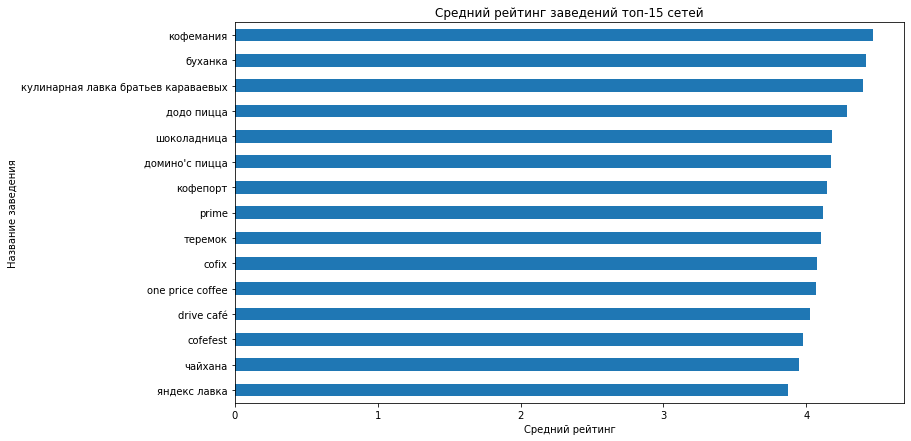

In [66]:
# визуализируем информацию
fig, ax = plt.subplots(figsize=(12, 7))  # задаём размер графика
result_df.plot(y='mean_rating', x='name', kind='barh', legend=None, ax=ax, rot=0)

# Подписи и оформление
plt.title('Средний рейтинг заведений топ-15 сетей')
plt.xlabel('Средний рейтинг')
plt.ylabel('Название заведения')
plt.show()

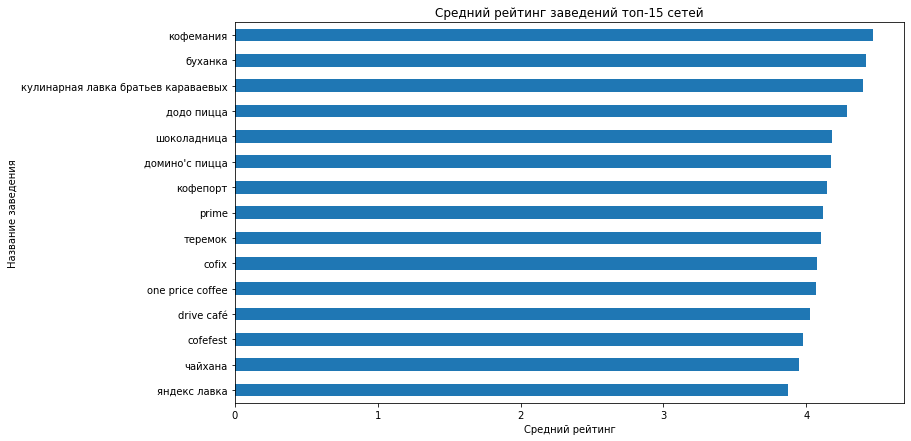

In [67]:
# визуализируем информацию
fig, ax = plt.subplots(figsize=(12, 7))  # задаём размер графика
result_df.plot(y='mean_rating', x='name', kind='barh', legend=None, ax=ax, rot=0)

# Подписи и оформление
plt.title('Средний рейтинг заведений топ-15 сетей')
plt.xlabel('Средний рейтинг')
plt.ylabel('Название заведения')
plt.show()
########!!!

Из всех заведений топ-15 сетей наибольший рейтинг у булочной Буханка - 4.396, второе место занимает кафе Кулинарная братьев Караваевых - 4.494, на третьем месте заведение быстрого питания Хинкальная - 4.32.

Мы получили топ-15 сетевых заведений Москвы, лидирующее место занимает кофейня Шоколадница со средним рейтингом 4.17. На втором месте по кол-ву заведений пиццерия домино'с пицца со средним рейтингом 4.16. На третьем месте пиццерия Додо пицца с рейтингом 4.28. Последние строки топа занимает кофейня Кофемания с рейтингом 4.46 и кафе drive café с рейтингом 4.02.

При этом если смотреть на рейтинг заведений, то лидирующие места занимает кофемания (4.46), буханка (4.41) и кулинарная лавка братьев караваевых (4.39), а на последних строках ресторан яндекс лавка (3.87) и кафе чайхона (3.94). 

___
Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Посмотрим, как удалённость от центра влияет на цены в заведениях? 

In [68]:
df_avg_bill = df.loc[df['middle_avg_bill'] >= 0]

In [69]:
df_avg_bill['middle_avg_bill'].describe()

count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Стандартное отклонение равно 1010, что свидетельствует о высоком уровне разброса данных. Минимальное значение — 0, максимальное — 35000. Очень широкая амплитуда значений также указывает на сильную неоднородность данных. Низкие квартили при большом максимальном значении свидетельствуют о сильном правостороннем сдвиге распределения: основное ядро данных лежит в нижней половине диапазона, а большие значения встречаются редко, но значительно увеличивают среднее значение.

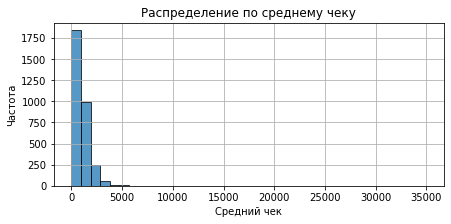

In [70]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_avg_bill['middle_avg_bill'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=37, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение по среднему чеку')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

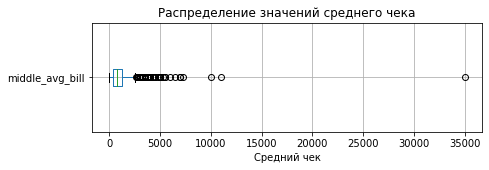

In [71]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_avg_bill.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

In [72]:
print('Распределение среднего чека по райнам:')
df_avg_bill.groupby('district')['middle_avg_bill'].agg(['mean', 'median'])

Распределение среднего чека по райнам:


,mean,median
district,,
Восточный административный округ,820.626953,575.0
Западный административный округ,1053.225464,1000.0
Северный административный округ,927.959656,650.0
Северо-Восточный административный округ,716.611267,500.0
Северо-Западный административный округ,822.222900,700.0
Центральный административный округ,1191.057495,1000.0
Юго-Восточный административный округ,654.097961,450.0
Юго-Западный административный округ,792.561707,600.0
Южный административный округ,834.398071,500.0


В центральном районе средний чек самый высокий и составляет 1191 рубль, в Юго-Восточном округе самый низкий средний чек и составляет он 654 рублей.

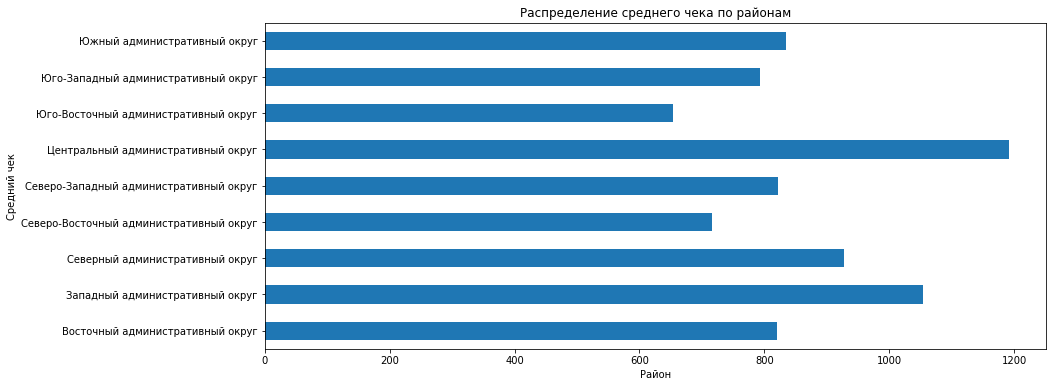

In [73]:
avg_price_by_district = df_avg_bill.groupby('district')['middle_avg_bill'].mean()

# Строим столбчатую диаграмму
plt.figure(figsize=(14, 6))
ax = avg_price_by_district.plot(x='district', 
                                y='middle_avg_bill', 
                                kind='barh', 
                                rot=0)

# Настраиваем оформление графика
plt.title('Распределение среднего чека по районам')
plt.xlabel('Район')
plt.ylabel('Средний чек')

# Выводим график
plt.show()

Данные по среднему чеку заведений характеризуются сильным правосторонним перекосом. Большее количество наблюдений расположено в нижней части спектра, тогда как редкие крупные значения существенно поднимают среднее и создают большую дисперсию. Имеется выброс в размере 35 000.

В центральном административном округе и западном административном округе медианное значение среднего чека равно 1000 рублей, что является самым большим среди районов. В юго-восточном самые низкие цены, медианный чек равен 450 рублей. Можно сделать вывод, что район влияет на ценообразование в заведениях. 

### Выводы:
- В данных представлено 8 категорий заведений, самые популярные из них - кафе, ресторан и кофейня. Причем популярность данных категорий прослеживается как в разрезе общих данных, так и в разреце центрального административного района.
- Центральный административный округ берет на себя 27% всех заведений города, Северо-Западный административный округ является самым не населенным заведениями.
- Не сетевые заведения преобладают над сетевыми в соотношении 62% к 38%
- Количество посадочных мест имеет сильную неоднородность, присутствуют выбросы, которые могут быть связаны с расположением заведений в торговых центрах, стадионах или других крупных площадках
- Оценки заведений близки между собой и находятся в диапазоне от 4 до 4.5, самая высокая оценка у баров, а наименьшая у заведений быстрого питания
- Лидирующее место среди московских сетевых заведений занимает Шоколадница 
- Средний чек в заведениях очень отличается в зависимости от района, наибольший в центральном и западном административном округе

## Итоговый вывод и рекомендации

В ходе исследования проанализировали данные заведений города Москва. Данные включали информацию о названии, расположении, ценовой политике, посадочных местах и др. заведений. Акцент исследования делался на том, чтобы найти взаимосвязи рейтинга заведений, популярности расположений заведений по округам Москвы и распределении заведений по категориям. 

### Общий обзор проделанной работы:
Были проанализированы предоставленные данные по конкурентным заведениям. Были изучены пропуски в данных, все пропуски были заменены на индикаторы. Данные проверили на явные и неявные дубликаты, а также изменили тип данных некоторых столбцов для более корректной работы на этапе предобработки данных. 

Проанализировали категории, которые представлены в данных, нашли самые популярные срали них, также рассмотрели районы на количество заведений в них  

Изучили соотношение сетевых и не сетевых заведений, рассмотрели количество посадочных мест, отметили их неоднородность. 

Также в рамках анализа мы исследовали рейтинг и попробовали найти взаимосвязь этой переменной с другими. 

Выявили топ-15 заведений Москва, предоставили информацию со средним рейтингом данных заведений, а также изучили средний чек в зависимости от района города


### Главные выводы: 
- Больше всего заведений представлено в категориях `кафе`, `ресторан` и `кофейня`: 2 377, 2 041 и 1 413 соответственно.
- Количество заведений в центральном административном округе преобладает (2 242), наименьшее количество заведений в Северно-Западном административном округе (409)
- При этом в центральном административном округе преобладают рестораны, кафе и кофейни, такой же популярностью эти категории пользуются среди всех округов в целом
- Не сетевых заведений в Москве больше, чем сетевых (5 199 против 3 204). Из сетевых больше всего по количеству кафе, ресторанов и кофейн. 
- В среднем количество посадочных мест в заведениях соответствует категориям:
    -  Бар, паб - 60
    -  Кафе - 40
    -  Кофейни - 100
    -  Пиццерия - 40
    -  Ресторан - 100
    -  Столовая - 40
    -  Булочные и заведено быстрого питания не имеют посадочных мест

При этом имеются аномально-высокие значения
- Рейтинг у всех категорий заведений примерно одинаковый и варьируется от 4 до 4.4 
- Рейтинг больше всего зависит от ценообразования, другие факты в меньшей степени на это влияют

### Рекомендации на основе анализа данных:
Исходя из анализа и выводов выше, можно было бы порекомендовать не открывать заведение в уже наполненном конкурентами центральном районе, а присмотреться к районам с более низкой плотностью, но возможно не стоит рассматривать северо-западный административный округ из-за того, что малое количество открытых там заведений может свидетельствовать о низком спросе на них у жителей. Остальные районы можно рассматривать.

Можно открыть популярные везде кафе, рестораны или кофейни, если заказчик готов к конкуренции в этом направлении. Или же присмотреться к пекарне, потому как по рейтингу эта категория среди сетевых заведений имеет наивысшую оценку. 

Можно рассмотреть открытие франшизы у сетевого заведения, чтобы не заниматься с нуля набором рейтинга. 